# Basic Exercises on Data Importing - Understanding - Manipulating - Analysis - Visualization

## Section-1: The pupose of the below exercises (1-7) is to create dictionary and convert into dataframes, how to diplay etc...
## The below exercises required to create data 

### 1. Import the necessary libraries (pandas, numpy, datetime, re etc)

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import re
import os
import warnings;warnings.filterwarnings('ignore')
import calendar
import pandas_profiling
from pandas.tseries.offsets import BMonthEnd
from datetime import datetime

# set the graphs to show in the jupyter notebook
%matplotlib inline

# set seabor graphs to a better style
sns.set(style="ticks")

### 2. Run the below line of code to create a dictionary and this will be used for below exercises

In [31]:
raw_data = {"name": ['Bulbasaur', 'Charmander','Squirtle','Caterpie'],
            "evolution": ['Ivysaur','Charmeleon','Wartortle','Metapod'],
            "type": ['grass', 'fire', 'water', 'bug'],
            "hp": [45, 39, 44, 45],
            "pokedex": ['yes', 'no','yes','no']                        
            }

### 3. Assign it to a object called pokemon and it should be a pandas DataFrame

In [37]:
pokemon = pd.DataFrame(raw_data)
pokemon

,name,evolution,type,hp,pokedex
0,Bulbasaur,Ivysaur,grass,45,yes
1,Charmander,Charmeleon,fire,39,no
2,Squirtle,Wartortle,water,44,yes
3,Caterpie,Metapod,bug,45,no


### 4. If the DataFrame columns are in alphabetical order, change the order of the columns as name, type, hp, evolution, pokedex

In [39]:
pokemon = pokemon[['name','type','hp','evolution','pokedex']]
pokemon

,name,type,hp,evolution,pokedex
0,Bulbasaur,grass,45,Ivysaur,yes
1,Charmander,fire,39,Charmeleon,no
2,Squirtle,water,44,Wartortle,yes
3,Caterpie,bug,45,Metapod,no


### 5. Add another column called place, and insert places (lakes, parks, hills, forest etc) of your choice.

In [40]:
pokemon['place'] = ['lakes', 'parks', 'hills', 'forest' ]

,name,type,hp,evolution,pokedex,place
0,Bulbasaur,grass,45,Ivysaur,yes,lakes
1,Charmander,fire,39,Charmeleon,no,parks
2,Squirtle,water,44,Wartortle,yes,hills
3,Caterpie,bug,45,Metapod,no,forest


### 6. Display the data type of each column

In [41]:
pokemon.dtypes

name         object
type         object
hp            int64
evolution    object
pokedex      object
place        object
dtype: object

### 7. Display the info of dataframe

In [42]:
pokemon

,name,type,hp,evolution,pokedex,place
0,Bulbasaur,grass,45,Ivysaur,yes,lakes
1,Charmander,fire,39,Charmeleon,no,parks
2,Squirtle,water,44,Wartortle,yes,hills
3,Caterpie,bug,45,Metapod,no,forest


## Section-2: The pupose of the below exercise (8-20) is to understand deleting data with pandas.
## The below exercises required to use wine.data

### 8. Import the dataset *wine.txt* from the folder and assign it to a object called wine

Please note that the original data text file doesn't contain any header. Please ensure that when you import the data, you should use a suitable argument so as to avoid data getting imported as header.

In [92]:
headers = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14']
wine = pd.read_csv('wine.txt',names=headers)
wine

,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


### 9. Delete the first, fourth, seventh, nineth, eleventh, thirteenth and fourteenth columns

In [94]:
d = ['1','4','7','9','11','13','14']
wine_d = wine.drop(d,axis=1)

### 10. Assign the columns as below:

The attributes are (dontated by Riccardo Leardi, riclea '@' anchem.unige.it):  
1) alcohol  
2) malic_acid  
3) alcalinity_of_ash  
4) magnesium  
5) flavanoids  
6) proanthocyanins  
7) hue 

In [95]:
new_names = {'2':'alcohol','3':'malic_acid','5':'alcalinity_of_ash','6':'magnesium',
             '8':'flavanoids','10':'proanthocyanins','12':'hue'}
wine = wine_d.rename(columns = new_names)
wine

,alcohol,malic_acid,alcalinity_of_ash,magnesium,flavanoids,proanthocyanins,hue
0,14.23,1.71,15.6,127,3.06,2.29,1.04
1,13.20,1.78,11.2,100,2.76,1.28,1.05
2,13.16,2.36,18.6,101,3.24,2.81,1.03
3,14.37,1.95,16.8,113,3.49,2.18,0.86
4,13.24,2.59,21.0,118,2.69,1.82,1.04
...,...,...,...,...,...,...,...
173,13.71,5.65,20.5,95,0.61,1.06,0.64
174,13.40,3.91,23.0,102,0.75,1.41,0.70
175,13.27,4.28,20.0,120,0.69,1.35,0.59
176,13.17,2.59,20.0,120,0.68,1.46,0.60


### 11. Set the values of the first 3 values from alcohol column as NaN

In [96]:
wine.loc[:2,['alcohol','malic_acid','alcalinity_of_ash']]=np.nan
wine

,alcohol,malic_acid,alcalinity_of_ash,magnesium,flavanoids,proanthocyanins,hue
0,NaN,NaN,NaN,127,3.06,2.29,1.04
1,NaN,NaN,NaN,100,2.76,1.28,1.05
2,NaN,NaN,NaN,101,3.24,2.81,1.03
3,14.37,1.95,16.8,113,3.49,2.18,0.86
4,13.24,2.59,21.0,118,2.69,1.82,1.04
...,...,...,...,...,...,...,...
173,13.71,5.65,20.5,95,0.61,1.06,0.64
174,13.40,3.91,23.0,102,0.75,1.41,0.70
175,13.27,4.28,20.0,120,0.69,1.35,0.59
176,13.17,2.59,20.0,120,0.68,1.46,0.60


### 12. Now set the value of the rows 3 and 4 of magnesium as NaN

In [97]:
wine.loc[3:4,'magnesium']=np.nan
wine

,alcohol,malic_acid,alcalinity_of_ash,magnesium,flavanoids,proanthocyanins,hue
0,NaN,NaN,NaN,127.0,3.06,2.29,1.04
1,NaN,NaN,NaN,100.0,2.76,1.28,1.05
2,NaN,NaN,NaN,101.0,3.24,2.81,1.03
3,14.37,1.95,16.8,NaN,3.49,2.18,0.86
4,13.24,2.59,21.0,NaN,2.69,1.82,1.04
...,...,...,...,...,...,...,...
173,13.71,5.65,20.5,95.0,0.61,1.06,0.64
174,13.40,3.91,23.0,102.0,0.75,1.41,0.70
175,13.27,4.28,20.0,120.0,0.69,1.35,0.59
176,13.17,2.59,20.0,120.0,0.68,1.46,0.60


### 13. Fill the value of NaN with the number 10 in alcohol and 100 in magnesium

In [98]:
wine.loc[10,'alcohol']=np.nan
wine.loc[100,'magnesium']=np.nan

### 14. Count the number of missing values in all columns.

In [99]:
wine.isnull().sum()

alcohol              4
malic_acid           3
alcalinity_of_ash    3
magnesium            3
flavanoids           0
proanthocyanins      0
hue                  0
dtype: int64

### 15.  Create an array of 10 random numbers up until 10 and save it.

In [52]:
ra = np.random.randint(0,10,size=10)
array = ra
array

array([9, 5, 2, 7, 9, 6, 5, 9, 3, 8])

In [100]:
array

array([9, 5, 2, 7, 9, 6, 5, 9, 3, 8])

### 16.  Set the rows corresponding to the random numbers to NaN in the column *alcohol*

In [101]:
wine.loc[array,'alcohol']=np.nan
wine

,alcohol,malic_acid,alcalinity_of_ash,magnesium,flavanoids,proanthocyanins,hue
0,NaN,NaN,NaN,127.0,3.06,2.29,1.04
1,NaN,NaN,NaN,100.0,2.76,1.28,1.05
2,NaN,NaN,NaN,101.0,3.24,2.81,1.03
3,NaN,1.95,16.8,NaN,3.49,2.18,0.86
4,13.24,2.59,21.0,NaN,2.69,1.82,1.04
...,...,...,...,...,...,...,...
173,13.71,5.65,20.5,95.0,0.61,1.06,0.64
174,13.40,3.91,23.0,102.0,0.75,1.41,0.70
175,13.27,4.28,20.0,120.0,0.69,1.35,0.59
176,13.17,2.59,20.0,120.0,0.68,1.46,0.60


### 17.  How many missing values do we have now?

In [103]:
wine.isnull().sum().sum()

19

### 18. Print only the non-null values in alcohol

In [104]:
n=wine['alcohol'][wine['alcohol'].notnull()]
n

4      13.24
11     14.12
12     13.75
13     14.75
14     14.38
       ...  
173    13.71
174    13.40
175    13.27
176    13.17
177    14.13
Name: alcohol, Length: 168, dtype: float64

### 19. Delete the rows that contain missing values

In [114]:
wine.dropna()


,alcohol,malic_acid,alcalinity_of_ash,magnesium,flavanoids,proanthocyanins,hue
11,14.12,1.48,16.8,95.0,2.43,1.57,1.17
12,13.75,1.73,16.0,89.0,2.76,1.81,1.15
13,14.75,1.73,11.4,91.0,3.69,2.81,1.25
14,14.38,1.87,12.0,102.0,3.64,2.96,1.20
15,13.63,1.81,17.2,112.0,2.91,1.46,1.28
...,...,...,...,...,...,...,...
173,13.71,5.65,20.5,95.0,0.61,1.06,0.64
174,13.40,3.91,23.0,102.0,0.75,1.41,0.70
175,13.27,4.28,20.0,120.0,0.69,1.35,0.59
176,13.17,2.59,20.0,120.0,0.68,1.46,0.60


### 20.  Reset the index, so it starts with 0 again

In [115]:
wine.dropna().reset_index()

,index,alcohol,malic_acid,alcalinity_of_ash,magnesium,flavanoids,proanthocyanins,hue
0,11,14.12,1.48,16.8,95.0,2.43,1.57,1.17
1,12,13.75,1.73,16.0,89.0,2.76,1.81,1.15
2,13,14.75,1.73,11.4,91.0,3.69,2.81,1.25
3,14,14.38,1.87,12.0,102.0,3.64,2.96,1.20
4,15,13.63,1.81,17.2,112.0,2.91,1.46,1.28
...,...,...,...,...,...,...,...,...
161,173,13.71,5.65,20.5,95.0,0.61,1.06,0.64
162,174,13.40,3.91,23.0,102.0,0.75,1.41,0.70
163,175,13.27,4.28,20.0,120.0,0.69,1.35,0.59
164,176,13.17,2.59,20.0,120.0,0.68,1.46,0.60


## Section-3: The pupose of the below exercise (21-27) is to understand ***filtering & sorting*** data from dataframe.
## The below exercises required to use chipotle.tsv

This time we are going to pull data directly from the internet.  
Import the dataset directly from this link (https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv) and create dataframe called chipo

In [56]:
chipo = pd.read_table('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv' )

### 21. How many products cost more than $10.00? 

Use `str` attribute to remove the $ sign and convert the column to proper numeric type data before filtering.


In [57]:
chipo['item_price'] = chipo['item_price'].str.replace('$', '').astype(float)

In [136]:
chipo[chipo['item_price']>10.00]

,order_id,quantity,item_name,choice_description,item_price
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.75
13,7,1,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
23,12,1,Chicken Burrito,"[[Tomatillo-Green Chili Salsa (Medium), Tomati...",10.98
...,...,...,...,...,...
4610,1830,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75
4611,1830,1,Veggie Burrito,"[Tomatillo Green Chili Salsa, [Rice, Fajita Ve...",11.25
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75


### 22. Print the Chipo Dataframe & info about data frame

In [137]:
chipo

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


In [138]:
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_id            4622 non-null   int64  
 1   quantity            4622 non-null   int64  
 2   item_name           4622 non-null   object 
 3   choice_description  3376 non-null   object 
 4   item_price          4622 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 180.7+ KB


### 24. Sort by the name of the item

In [139]:
chipo.sort_values(by='item_name',ascending=True)

,order_id,quantity,item_name,choice_description,item_price
3389,1360,2,6 Pack Soft Drink,[Diet Coke],12.98
341,148,1,6 Pack Soft Drink,[Diet Coke],6.49
1849,749,1,6 Pack Soft Drink,[Coke],6.49
1860,754,1,6 Pack Soft Drink,[Diet Coke],6.49
2713,1076,1,6 Pack Soft Drink,[Coke],6.49
...,...,...,...,...,...
2384,948,1,Veggie Soft Tacos,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",8.75
781,322,1,Veggie Soft Tacos,"[Fresh Tomato Salsa, [Black Beans, Cheese, Sou...",8.75
2851,1132,1,Veggie Soft Tacos,"[Roasted Chili Corn Salsa (Medium), [Black Bea...",8.49
1699,688,1,Veggie Soft Tacos,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25


### 25. What was the quantity of the most expensive item ordered?

In [120]:
chipo[chipo.item_price==chipo.item_price.max()].quantity

3598    15
Name: quantity, dtype: int64

### 26. How many times were a Veggie Salad Bowl ordered?

In [62]:
v = chipo[chipo['item_name'] == 'Veggie Salad Bowl']
b = v.order_id
len(b)

18

### 27. How many times people orderd more than one Canned Soda?

In [64]:
c = chipo[chipo['item_name']=='Canned Soda']
s = c.quantity.sum()
s

126

## Section-4: The purpose of the below exercises is to understand how to perform aggregations of data frame
## The below exercises (28-33) required to use occupation.csv

###  28. Import the dataset occupation.csv and assign object as users

In [102]:
users = pd.read_csv('occupation.csv',sep='|')
users

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


### 29. Discover what is the mean age per occupation

In [90]:
o = pd.pivot_table(data=users,index='occupation',values='age',aggfunc='mean')
o.sort_values(by='age',ascending=False)

,age
occupation,
retired,63.071429
doctor,43.571429
educator,42.010526
healthcare,41.562500
librarian,40.000000
administrator,38.746835
executive,38.718750
marketing,37.615385
lawyer,36.750000


### 30. Discover the Male ratio per occupation and sort it from the most to the least.

Use numpy.where() to encode gender column.

In [103]:
users['is_male'] = np.where(users.gender=='M',1,0)
male = users.groupby(users.occupation)[['is_male']].sum()
nm = users.groupby(users.occupation)[['is_male']].count()
r = male/nm
r

,is_male
occupation,
administrator,0.544304
artist,0.535714
doctor,1.000000
educator,0.726316
engineer,0.970149
entertainment,0.888889
executive,0.906250
healthcare,0.312500
homemaker,0.142857


### 31. For each occupation, calculate the minimum and maximum ages

In [44]:
o = users.groupby('occupation')['age'].agg(['max','min'])
o.sort_values

,max,min
occupation,,
administrator,70,21
artist,48,19
doctor,64,28
educator,63,23
engineer,70,22
entertainment,50,15
executive,69,22
healthcare,62,22
homemaker,50,20


### 32. For each combination of occupation and gender, calculate the mean age

In [46]:
pd.pivot_table(data=users,index='occupation',columns = 'gender',values ='age',aggfunc='mean')

gender,F,M
occupation,,
administrator,40.638889,37.162791
artist,30.307692,32.333333
doctor,NaN,43.571429
educator,39.115385,43.101449
engineer,29.500000,36.600000
entertainment,31.000000,29.000000
executive,44.000000,38.172414
healthcare,39.818182,45.400000
homemaker,34.166667,23.000000


### 33.  For each occupation present the percentage of women and men

In [111]:
#r*100
r['is_female']=1-r.is_male
percent_table=r*100
percent_table

,is_male,is_female
occupation,,
administrator,54.430380,45.569620
artist,53.571429,46.428571
doctor,100.000000,0.000000
educator,72.631579,27.368421
engineer,97.014925,2.985075
entertainment,88.888889,11.111111
executive,90.625000,9.375000
healthcare,31.250000,68.750000
homemaker,14.285714,85.714286


## Section-6: The purpose of the below exercises is to understand how to use lambda-apply-functions
## The below exercises (34-41) required to use student-mat.csv and student-por.csv files 

### 34. Import the datasets *student-mat* and *student-por* and append them and assigned object as df

In [27]:
mat=pd.read_csv('student-mat.csv')
por=pd.read_csv('student-por.csv')
#df=pd.merge(left=mat,right=por,on='school',how='left')
df=mat.append(por)
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


### 35. For the purpose of this exercise slice the dataframe from 'school' until the 'guardian' column

In [28]:
df.loc[:,'school':'guardian']

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother
4,GP,F,16,U,GT3,T,3,3,other,other,home,father
...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,course,mother
645,MS,F,18,U,LE3,T,3,1,teacher,services,course,mother
646,MS,F,18,U,GT3,T,1,1,other,other,course,mother
647,MS,M,17,U,LE3,T,3,1,services,services,course,mother


### 36. Create a lambda function that captalize strings (example: if we give at_home as input function and should give At_home as output.

In [8]:
c = lambda x : x.capitalize()
c('df')

'Df'

### 37. Capitalize both Mjob and Fjob variables using above lamdba function

In [29]:
c = lambda x : x.capitalize()
cp = ['Mjob','Fjob']
for col in cp:
    df[col] = df[col].apply(c)
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,At_home,Teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,At_home,Other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,At_home,Other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,Health,Services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,Other,Other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,Services,Other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,Teacher,Services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,Other,Other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,Services,Services,...,2,4,5,3,4,2,6,10,10,10


### 38. Print the last elements of the data set. (Last few records)

In [131]:
df.tail(1)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
648,MS,M,18,R,LE3,T,3,2,Services,Other,...,4,4,1,3,4,5,4,10,11,11


### 39. Did you notice the original dataframe is still lowercase? Why is that? Fix it and captalize Mjob and Fjob.

In [133]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,Teacher,Teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,Other,Other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,Other,Other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,Services,Services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,Other,Other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,Other,Other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,Services,Services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,Other,Other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,Services,Services,...,2,4,5,3,4,2,6,10,10,10


### 40. Create a function called majority that return a boolean value to a new column called legal_drinker

In [30]:
def majority(age):
    return age>=18

df['legal_drinker'] = df['age'].apply(majority)

df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,legal_drinker
0,GP,F,18,U,GT3,A,4,4,At_home,Teacher,...,3,4,1,1,3,6,5,6,6,True
1,GP,F,17,U,GT3,T,1,1,At_home,Other,...,3,3,1,1,3,4,5,5,6,False
2,GP,F,15,U,LE3,T,1,1,At_home,Other,...,3,2,2,3,3,10,7,8,10,False
3,GP,F,15,U,GT3,T,4,2,Health,Services,...,2,2,1,1,5,2,15,14,15,False
4,GP,F,16,U,GT3,T,3,3,Other,Other,...,3,2,1,2,5,4,6,10,10,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,Services,Other,...,4,2,1,2,5,4,10,11,10,True
645,MS,F,18,U,LE3,T,3,1,Teacher,Services,...,3,4,1,1,1,4,15,15,16,True
646,MS,F,18,U,GT3,T,1,1,Other,Other,...,1,1,1,1,5,6,11,12,9,True
647,MS,M,17,U,LE3,T,3,1,Services,Services,...,4,5,3,4,2,6,10,10,10,False


In [19]:
df.dtypes

school           object
sex              object
age               int64
address          object
famsize          object
Pstatus          object
Medu              int64
Fedu              int64
Mjob             object
Fjob             object
reason           object
guardian         object
traveltime        int64
studytime         int64
failures          int64
schoolsup        object
famsup           object
paid             object
activities       object
nursery          object
higher           object
internet         object
romantic         object
famrel            int64
freetime          int64
goout             int64
Dalc              int64
Walc              int64
health            int64
absences          int64
G1                int64
G2                int64
G3                int64
legal_drinker      bool
dtype: object

### 41. Multiply every number of the dataset by 10. 

In [32]:
#d = lambda x : x*10
#for col in df:
    #if df[col].dtype=='int64':
        #df[col] = df[col].apply(d)
    #elif df[col].dtype=='object' or df[col].dtype=='bool':
        #df[col]

df        

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,legal_drinker
0,GP,F,180,U,GT3,A,40,40,At_home,Teacher,...,30,40,10,10,30,60,50,60,60,True
1,GP,F,170,U,GT3,T,10,10,At_home,Other,...,30,30,10,10,30,40,50,50,60,False
2,GP,F,150,U,LE3,T,10,10,At_home,Other,...,30,20,20,30,30,100,70,80,100,False
3,GP,F,150,U,GT3,T,40,20,Health,Services,...,20,20,10,10,50,20,150,140,150,False
4,GP,F,160,U,GT3,T,30,30,Other,Other,...,30,20,10,20,50,40,60,100,100,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,190,R,GT3,T,20,30,Services,Other,...,40,20,10,20,50,40,100,110,100,True
645,MS,F,180,U,LE3,T,30,10,Teacher,Services,...,30,40,10,10,10,40,150,150,160,True
646,MS,F,180,U,GT3,T,10,10,Other,Other,...,10,10,10,10,50,60,110,120,90,True
647,MS,M,170,U,LE3,T,30,10,Services,Services,...,40,50,30,40,20,60,100,100,100,False


## Section-6: The purpose of the below exercises is to understand how to perform simple joins
## The below exercises (42-48) required to use cars1.csv and cars2.csv files 

### 42. Import the datasets cars1.csv and cars2.csv and assign names as cars1 and cars2

In [73]:
cars1 = pd.read_csv('cars1.csv')
cars2 = pd.read_csv('cars2.csv')

   ### 43. Print the information to cars1 by applying below functions 
   hint: Use different functions/methods like type(), head(), tail(), columns(), info(), dtypes(), index(), shape(), count(), size(), ndim(), axes(), describe(), memory_usage(), sort_values(), value_counts()
   Also create profile report using pandas_profiling.Profile_Report

In [76]:
type(cars1)

pandas.core.frame.DataFrame

In [43]:
cars1.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,18.0,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu,NaN,NaN,NaN,NaN,NaN
1,15.0,8,350,165,3693,11.5,70,1,buick skylark 320,NaN,NaN,NaN,NaN,NaN
2,18.0,8,318,150,3436,11.0,70,1,plymouth satellite,NaN,NaN,NaN,NaN,NaN
3,16.0,8,304,150,3433,12.0,70,1,amc rebel sst,NaN,NaN,NaN,NaN,NaN
4,17.0,8,302,140,3449,10.5,70,1,ford torino,NaN,NaN,NaN,NaN,NaN


In [44]:
cars1.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
193,24.0,6,200,81,3012,17.6,76,1,ford maverick,NaN,NaN,NaN,NaN,NaN
194,22.5,6,232,90,3085,17.6,76,1,amc hornet,NaN,NaN,NaN,NaN,NaN
195,29.0,4,85,52,2035,22.2,76,1,chevrolet chevette,NaN,NaN,NaN,NaN,NaN
196,24.5,4,98,60,2164,22.1,76,1,chevrolet woody,NaN,NaN,NaN,NaN,NaN
197,29.0,4,90,70,1937,14.2,76,2,vw rabbit,NaN,NaN,NaN,NaN,NaN


In [50]:
cars1.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model', 'origin', 'car', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13'],
      dtype='object')

In [51]:
cars1.info

<bound method DataFrame.info of       mpg  cylinders  displacement horsepower  weight  acceleration  model  \
0    18.0          8           307        130    3504          12.0     70   
1    15.0          8           350        165    3693          11.5     70   
2    18.0          8           318        150    3436          11.0     70   
3    16.0          8           304        150    3433          12.0     70   
4    17.0          8           302        140    3449          10.5     70   
..    ...        ...           ...        ...     ...           ...    ...   
193  24.0          6           200         81    3012          17.6     76   
194  22.5          6           232         90    3085          17.6     76   
195  29.0          4            85         52    2035          22.2     76   
196  24.5          4            98         60    2164          22.1     76   
197  29.0          4            90         70    1937          14.2     76   

     origin                    

In [75]:
cars1.dtypes

mpg             float64
cylinders         int64
displacement      int64
horsepower       object
weight            int64
acceleration    float64
model             int64
origin            int64
car              object
Unnamed: 9      float64
Unnamed: 10     float64
Unnamed: 11     float64
Unnamed: 12     float64
Unnamed: 13     float64
dtype: object

In [79]:
cars1.index

RangeIndex(start=0, stop=198, step=1)

In [81]:
cars1.shape

(198, 14)

In [82]:
cars1.count()

mpg             198
cylinders       198
displacement    198
horsepower      198
weight          198
acceleration    198
model           198
origin          198
car             198
Unnamed: 9        0
Unnamed: 10       0
Unnamed: 11       0
Unnamed: 12       0
Unnamed: 13       0
dtype: int64

In [84]:
cars1.size

2772

In [86]:
cars1.ndim

2

In [88]:
cars1.axes

[RangeIndex(start=0, stop=198, step=1),
 Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
        'acceleration', 'model', 'origin', 'car', 'Unnamed: 9', 'Unnamed: 10',
        'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13'],
       dtype='object')]

In [89]:
cars1.describe()

,mpg,cylinders,displacement,weight,acceleration,model,origin,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
count,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,0.0,0.0,0.0,0.0,0.0
mean,19.719697,5.898990,223.469697,3177.888889,15.005556,72.818182,1.439394,NaN,NaN,NaN,NaN,NaN
std,5.814254,1.785417,115.181017,934.783733,2.872382,1.865332,0.708085,NaN,NaN,NaN,NaN,NaN
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000,NaN,NaN,NaN,NaN,NaN
25%,15.000000,4.000000,113.250000,2302.500000,13.000000,71.000000,1.000000,NaN,NaN,NaN,NaN,NaN
50%,19.000000,6.000000,228.000000,3030.000000,15.000000,73.000000,1.000000,NaN,NaN,NaN,NaN,NaN
75%,24.375000,8.000000,318.000000,4080.750000,16.800000,74.000000,2.000000,NaN,NaN,NaN,NaN,NaN
max,35.000000,8.000000,455.000000,5140.000000,23.500000,76.000000,3.000000,NaN,NaN,NaN,NaN,NaN


In [90]:
cars1.memory_usage()

Index            128
mpg             1584
cylinders       1584
displacement    1584
horsepower      1584
weight          1584
acceleration    1584
model           1584
origin          1584
car             1584
Unnamed: 9      1584
Unnamed: 10     1584
Unnamed: 11     1584
Unnamed: 12     1584
Unnamed: 13     1584
dtype: int64

In [93]:
cars1.sort_values(by='mpg',ascending=False)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
54,35.0,4,72,69,1613,18.0,71,3,datsun 1200,NaN,NaN,NaN,NaN,NaN
181,33.0,4,91,53,1795,17.5,75,3,honda civic cvcc,NaN,NaN,NaN,NaN,NaN
131,32.0,4,71,65,1836,21.0,74,3,toyota corolla 1200,NaN,NaN,NaN,NaN,NaN
145,32.0,4,83,61,2003,19.0,74,3,datsun 710,NaN,NaN,NaN,NaN,NaN
53,31.0,4,71,65,1773,19.0,71,3,toyota corolla 1200,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,11.0,8,400,150,4997,14.0,73,1,chevrolet impala,NaN,NaN,NaN,NaN,NaN
67,11.0,8,429,208,4633,11.0,72,1,mercury marquis,NaN,NaN,NaN,NaN,NaN
25,10.0,8,360,215,4615,14.0,70,1,ford f250,NaN,NaN,NaN,NaN,NaN
26,10.0,8,307,200,4376,15.0,70,1,chevy c20,NaN,NaN,NaN,NaN,NaN


In [94]:
cars1.value_counts()

Series([], dtype: int64)

In [76]:
profile = pandas_profiling.ProfileReport(cars1)
profile
file_loaction = 'C:/Users/Admin/Downloads/Python CS/Basic Data Manipulation - Visualization Exercise.html'
profile.to_file(file_loaction)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### 44. It seems our first dataset has some unnamed blank columns, fix cars1

In [ ]:
c = ['Unnamed: 9','Unnamed: 10','Unnamed: 11','Unnamed: 12','Unnamed: 13']
cars1 = cars1.drop(c,axis=1)

### 45. What is the number of observations in each dataset?

In [ ]:
#cars1 had null values and cars2 did not contain columns with null values as in cars1

### 46. Join cars1 and cars2 into a single DataFrame called cars

In [27]:
cars = pd.merge(left=cars1,right=cars2,on='mpg',how='left')
cars

,mpg,cylinders_x,displacement_x,horsepower_x,weight_x,acceleration_x,model_x,origin_x,car_x,cylinders_y,displacement_y,horsepower_y,weight_y,acceleration_y,model_y,origin_y,car_y
0,18.0,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu,6.0,250.0,78,3574.0,21.0,76.0,1.0,ford granada ghia
1,15.0,8,350,165,3693,11.5,70,1,buick skylark 320,8.0,302.0,130,4295.0,14.9,77.0,1.0,mercury cougar brougham
2,18.0,8,318,150,3436,11.0,70,1,plymouth satellite,6.0,250.0,78,3574.0,21.0,76.0,1.0,ford granada ghia
3,16.0,8,304,150,3433,12.0,70,1,amc rebel sst,8.0,400.0,180,4220.0,11.1,77.0,1.0,pontiac grand prix lj
4,16.0,8,304,150,3433,12.0,70,1,amc rebel sst,8.0,351.0,149,4335.0,14.5,77.0,1.0,ford thunderbird
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381,29.0,4,85,52,2035,22.2,76,1,chevrolet chevette,4.0,97.0,78,1940.0,14.5,77.0,2.0,volkswagen rabbit custom
382,29.0,4,85,52,2035,22.2,76,1,chevrolet chevette,4.0,135.0,84,2525.0,16.0,82.0,1.0,dodge aries se
383,24.5,4,98,60,2164,22.1,76,1,chevrolet woody,4.0,151.0,88,2740.0,16.0,77.0,1.0,pontiac sunbird coupe
384,29.0,4,90,70,1937,14.2,76,2,vw rabbit,4.0,97.0,78,1940.0,14.5,77.0,2.0,volkswagen rabbit custom


### 47. There is a column missing, called owners. Create a random number Series from 15,000 to 73,000.

In [33]:
r = np.random.randint(15000,73000,size=386)
owners = r
owners

array([57321, 61687, 22164, 54542, 23694, 59111, 61464, 65810, 23073,
       54376, 29014, 52831, 67032, 28050, 60452, 58627, 60932, 68418,
       46475, 32374, 53343, 25315, 48911, 31958, 17569, 58844, 63980,
       35082, 19936, 68718, 21823, 18956, 36275, 70788, 25203, 41806,
       46610, 30677, 21249, 71881, 47488, 67915, 71871, 24002, 28855,
       33054, 50191, 31519, 46360, 60147, 33334, 17464, 18681, 51884,
       60175, 35238, 55701, 41929, 23116, 60851, 33517, 64009, 31440,
       61624, 28997, 56989, 68134, 35328, 18349, 67167, 61717, 39243,
       56479, 17696, 54104, 72126, 27410, 52403, 47900, 35475, 64743,
       41385, 48426, 21974, 71507, 38623, 32765, 55405, 15778, 46182,
       58768, 35091, 31904, 70168, 40593, 71945, 22998, 35232, 27347,
       45662, 45453, 34149, 53607, 27273, 60952, 47996, 42688, 65128,
       29668, 62241, 25596, 19687, 70266, 71392, 34995, 17567, 53315,
       35456, 67789, 61048, 38769, 45549, 55110, 32659, 26093, 62525,
       69991, 40416,

In [34]:
owners

array([57321, 61687, 22164, 54542, 23694, 59111, 61464, 65810, 23073,
       54376, 29014, 52831, 67032, 28050, 60452, 58627, 60932, 68418,
       46475, 32374, 53343, 25315, 48911, 31958, 17569, 58844, 63980,
       35082, 19936, 68718, 21823, 18956, 36275, 70788, 25203, 41806,
       46610, 30677, 21249, 71881, 47488, 67915, 71871, 24002, 28855,
       33054, 50191, 31519, 46360, 60147, 33334, 17464, 18681, 51884,
       60175, 35238, 55701, 41929, 23116, 60851, 33517, 64009, 31440,
       61624, 28997, 56989, 68134, 35328, 18349, 67167, 61717, 39243,
       56479, 17696, 54104, 72126, 27410, 52403, 47900, 35475, 64743,
       41385, 48426, 21974, 71507, 38623, 32765, 55405, 15778, 46182,
       58768, 35091, 31904, 70168, 40593, 71945, 22998, 35232, 27347,
       45662, 45453, 34149, 53607, 27273, 60952, 47996, 42688, 65128,
       29668, 62241, 25596, 19687, 70266, 71392, 34995, 17567, 53315,
       35456, 67789, 61048, 38769, 45549, 55110, 32659, 26093, 62525,
       69991, 40416,

### 48. Add the column owners to cars

In [ ]:
cars['owners'] = owners

In [39]:
cars

,mpg,cylinders_x,displacement_x,horsepower_x,weight_x,acceleration_x,model_x,origin_x,car_x,cylinders_y,displacement_y,horsepower_y,weight_y,acceleration_y,model_y,origin_y,car_y,owners
0,18.0,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu,6.0,250.0,78,3574.0,21.0,76.0,1.0,ford granada ghia,57321
1,15.0,8,350,165,3693,11.5,70,1,buick skylark 320,8.0,302.0,130,4295.0,14.9,77.0,1.0,mercury cougar brougham,61687
2,18.0,8,318,150,3436,11.0,70,1,plymouth satellite,6.0,250.0,78,3574.0,21.0,76.0,1.0,ford granada ghia,22164
3,16.0,8,304,150,3433,12.0,70,1,amc rebel sst,8.0,400.0,180,4220.0,11.1,77.0,1.0,pontiac grand prix lj,54542
4,16.0,8,304,150,3433,12.0,70,1,amc rebel sst,8.0,351.0,149,4335.0,14.5,77.0,1.0,ford thunderbird,23694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381,29.0,4,85,52,2035,22.2,76,1,chevrolet chevette,4.0,97.0,78,1940.0,14.5,77.0,2.0,volkswagen rabbit custom,24001
382,29.0,4,85,52,2035,22.2,76,1,chevrolet chevette,4.0,135.0,84,2525.0,16.0,82.0,1.0,dodge aries se,30882
383,24.5,4,98,60,2164,22.1,76,1,chevrolet woody,4.0,151.0,88,2740.0,16.0,77.0,1.0,pontiac sunbird coupe,48931
384,29.0,4,90,70,1937,14.2,76,2,vw rabbit,4.0,97.0,78,1940.0,14.5,77.0,2.0,volkswagen rabbit custom,69299


## Section-7: The purpose of the below exercises is to understand how to perform date time operations

### 49. Write a Python script to display the
- a. Current date and time
- b. Current year
- c. Month of year
- d. Week number of the year
- e. Weekday of the week
- f. Day of year
- g. Day of the month
- h. Day of week

In [2]:
cd = datetime.now()
current_year = cd.year
month_year = cd.strftime('%B')
week_number = cd.strftime('%U')
weekday = cd.strftime('%w')
day_of_year = cd.strftime('%j')
day_of_month = cd.strftime('%d')
day_of_week = cd.strftime('%w')
print("The current date and time is ",cd)
print("The current year is",current_year)
print("The month of the year is",month_year)
print("The week number is ",week_number)
print("The weekday is ",weekday)
print("The day of the year is ",day_of_year)
print("The day of the month is ",day_of_month)
print("The day of the week is ",day_of_week)

The current date and time is  2023-06-15 14:58:15.874684
The current year is 2023
The month of the year is June
The week number is  24
The weekday is  4
The day of the year is  166
The day of the month is  15
The day of the week is  4


### 50. Write a Python program to convert a string to datetime.
Sample String : Jul 1 2014 2:43PM 

Expected Output : 2014-07-01 14:43:00

In [6]:
Sample_String = 'Jul 1 2014 2:43PM'
pd.to_datetime(Sample_String)

Timestamp('2014-07-01 14:43:00')

### 51. Write a Python program to subtract five days from current date.

Current Date : 2015-06-22

5 days before Current Date : 2015-06-17

In [21]:
Current_Date = '2015-06-22'    
five = pd.to_datetime(Current_Date)
five + pd.DateOffset(days=-5)

Timestamp('2015-06-17 00:00:00')

### 52. Write a Python program to convert unix timestamp string to readable date.

Sample Unix timestamp string : 1284105682
    
Expected Output : 2010-09-10 13:31:22

In [25]:
Sample_Unix_timestamp_string = 1284105682
u=datetime.fromtimestamp(Sample_Unix_timestamp_string)
pd.to_datetime(u)

Timestamp('2010-09-10 13:31:22')

### 53. Convert the below Series to pandas datetime : 

DoB = pd.Series(["07Sep59","01Jan55","15Dec47","11Jul42"])

Make sure that the year is 19XX not 20XX

In [36]:
DoB = pd.Series(["07Sep59","01Jan55","15Dec47","11Jul42"])
s = pd.to_datetime(DoB,format="%d%b%y")
s.apply(lambda x: x.replace(year=x.year-100))




0   1959-09-07
1   1955-01-01
2   1947-12-15
3   1942-07-11
dtype: datetime64[ns]

### 54. Write a Python program to get days between two dates. 

In [69]:
Date = '%d-%m-%Y'
Date1 = pd.to_datetime(input("Enter the 1st date :"),format = Date)
Date2 = pd.to_datetime(input("Enter the 2nd date :"),format = Date)
Date_n = Date1 - Date2
Date_n

Enter the 1st date :02-03-2020
Enter the 2nd date :02-04-2020


Timedelta('-31 days +00:00:00')

### 55. Convert the below date to datetime and then change its display format using the .dt module

Date = "15Dec1989"

Result : "Friday, 15 Dec 98"

In [76]:
Date = "15Dec1989"
D = datetime.strptime(Date,'%d%b%Y')
R = D.strftime('%A, %d %b %y')
R

'Friday, 15 Dec 89'

## The below exercises (56-66) required to use wind.data file 

### About wind.data:

The data have been modified to contain some missing values, identified by NaN.  

1. The data in 'wind.data' has the following format:

### 56. Import the dataset wind.data and assign it to a variable called data and replace the first 3 columns by a proper date time index

In [43]:
data = pd.read_csv("wind.data")
data['Yr'] = data['Yr'].astype(str)
data['Mo'] = data['Mo'].astype(str)
data['Dy'] = data['Dy'].astype(str)
data['date time'] = data['Yr'] +'-'+ data['Mo'] +'-'+ data['Dy']
data

,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,date time
0,61,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04,61-1-1
1,61,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83,61-1-2
2,61,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71,61-1-3
3,61,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88,61-1-4
4,61,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83,61-1-5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,78,12,27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08,78-12-27
6570,78,12,28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46,78-12-28
6571,78,12,29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58,78-12-29
6572,78,12,30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79,78-12-30


### 57. Year 2061 is seemingly imporoper. Convert every year which are < 70 to 19XX instead of 20XX.

In [12]:
ab = '19'
data['date time'] = ab + data['date time']

In [13]:
data

,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,date time
0,61,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04,1961-1-1
1,61,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83,1961-1-2
2,61,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71,1961-1-3
3,61,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88,1961-1-4
4,61,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83,1961-1-5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,78,12,27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08,1978-12-27
6570,78,12,28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46,1978-12-28
6571,78,12,29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58,1978-12-29
6572,78,12,30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79,1978-12-30


### 58. Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].

In [14]:
data['date time'] = pd.to_datetime(data['date time'])
data.dtypes

Yr                   object
Mo                   object
Dy                   object
RPT                 float64
VAL                 float64
ROS                 float64
KIL                 float64
SHA                 float64
BIR                 float64
DUB                 float64
CLA                 float64
MUL                 float64
CLO                 float64
BEL                 float64
MAL                 float64
date time    datetime64[ns]
dtype: object

In [15]:
data.set_index('date time', inplace=True)

In [16]:
drop = ['Yr','Mo','Dy']
data = data.drop(drop,axis=1)

In [17]:
data

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
date time,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58


### 59. Compute how many values are missing for each location over the entire record.  
#### They should be ignored in all calculations below. 

In [106]:
data.isnull().sum()

RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

### 60. Compute how many non-missing values there are in total.

In [108]:
data.count().sum()

78857

### 61. Calculate the mean windspeeds over all the locations and all the times.
#### A single number for the entire dataset.

In [110]:
data1 = data.mean()
data1.mean()

10.227982360836938

### 62. Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days 

#### A different set of numbers for each location.

In [118]:
loc_stats = data.agg(['min','max','mean','std'])
loc_stats

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
min,0.670000,0.210000,1.500000,0.000000,0.130000,0.000000,0.000000,0.000000,0.000000,0.040000,0.130000,0.670000
max,35.800000,33.370000,33.840000,28.460000,37.540000,26.160000,30.370000,31.080000,25.880000,28.210000,42.380000,42.540000
mean,12.362987,10.644314,11.660526,6.306468,10.455834,7.092254,9.797343,8.495053,8.493590,8.707332,13.121007,15.599079
std,5.618413,5.267356,5.008450,3.605811,4.936125,3.968683,4.977555,4.499449,4.166872,4.503954,5.835037,6.699794


### 63. Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day.

#### A different set of numbers for each day.

In [120]:
day_stats = data.groupby('date time').agg({'RPT':['min','max','mean','std'],
                                          'VAL':['min','max','mean','std'],
                                          'ROS':['min','max','mean','std'],
                                          'KIL':['min','max','mean','std'],
                                          'SHA':['min','max','mean','std'],
                                          'BIR':['min','max','mean','std'],
                                          'DUB':['min','max','mean','std'],
                                          'CLA':['min','max','mean','std'],
                                           'MUL':['min','max','mean','std'],
                                           'CLO':['min','max','mean','std'],
                                           'BEL':['min','max','mean','std'],
                                           'MAL':['min','max','mean','std']
                                          })
day_stats

RPT                      VAL                      ROS         \
              min    max   mean std    min    max   mean std    min    max   
date time                                                                    
1961-01-01  15.04  15.04  15.04 NaN  14.96  14.96  14.96 NaN  13.17  13.17   
1961-01-02  14.71  14.71  14.71 NaN    NaN    NaN    NaN NaN  10.83  10.83   
1961-01-03  18.50  18.50  18.50 NaN  16.88  16.88  16.88 NaN  12.33  12.33   
1961-01-04  10.58  10.58  10.58 NaN   6.63   6.63   6.63 NaN  11.75  11.75   
1961-01-05  13.33  13.33  13.33 NaN  13.25  13.25  13.25 NaN  11.42  11.42   
...           ...    ...    ...  ..    ...    ...    ...  ..    ...    ...   
1978-12-27  17.58  17.58  17.58 NaN  16.96  16.96  16.96 NaN  17.62  17.62   
1978-12-28  13.21  13.21  13.21 NaN   5.46   5.46   5.46 NaN  13.46  13.46   
1978-12-29  14.00  14.00  14.00 NaN  10.29  10.29  10.29 NaN  14.42  14.42   
1978-12-30  18.50  18.50  18.50 NaN  14.04  14.04  14.04 NaN  21.29  21.29   
1978-12-31  20.33  20.33  20.33 NaN  17.41  17.41  17.41 NaN  27.29  27.29   

            ...    CLO        BEL                      MAL                    
            ...   mean std    min    max   mean std    min    max   mean std  
date time   ...                                                               
1961-01-01  ...  12.58 NaN  18.50  18.50  18.50 NaN  15.04  15.04  15.04 NaN  
1961-01-02  ...   9.67 NaN  17.54  17.54  17.54 NaN  13.83  13.83  13.83 NaN  
1961-01-03  ...   7.67 NaN  12.75  12.75  12.75 NaN  12.71  12.71  12.71 NaN  
1961-01-04  ...   5.88 NaN   5.46   5.46   5.46 NaN  10.88  10.88  10.88 NaN  
1961-01-05  ...  10.34 NaN  12.92  12.92  12.92 NaN  11.83  11.83  11.83 NaN  
...         ...    ...  ..    ...    ...    ...  ..    ...    ...    ...  ..  
1978-12-27  ...  14.00 NaN  17.21  17.21  17.21 NaN  40.08  40.08  40.08 NaN  
1978-12-28  ...  18.05 NaN  21.79  21.79  21.79 NaN  41.46  41.46  41.46 NaN  
1978-12-29  ...  16.42 NaN  18.88  18.88  18.88 NaN  29.58  29.58  29.58 NaN  
1978-12-30  ...  12.12 NaN  14.67  14.67  14.67 NaN  28.79  28.79  28.79 NaN  
1978-12-31  ...  11.38 NaN  12.08  12.08  12.08 NaN  22.08  22.08  22.08 NaN  

[6574 rows x 48 columns]

### 64. Find the average windspeed in January for each location.  
#### Treat January 1961 and January 1962 both as January.

In [132]:
data01 = data[(data.index.month==1)]
Jan = data01.mean()
Jan

RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64

### 65. Calculate the mean windspeed for each month in the dataset.  
#### Treat January 1961 and January 1962 as *different* months.
#### (hint: first find a  way to create an identifier unique for each month.)

In [140]:
months = data.groupby([data.index.year, data.index.month]).mean()
months

RPT        VAL        ROS       KIL        SHA  \
date time date time                                                         
1961      1          14.841333  11.988333  13.431613  7.736774  11.072759   
          2          16.269286  14.975357  14.441481  9.230741  13.852143   
          3          10.890000  11.296452  10.752903  7.284000  10.509355   
          4          10.722667   9.427667   9.998000  5.830667   8.435000   
          5           9.860968   8.850000  10.818065  5.905333   9.490323   
...                        ...        ...        ...       ...        ...   
1978      8           9.645161   8.259355   9.032258  4.502903   7.368065   
          9          10.913667  10.895000  10.635000  5.725000  10.372000   
          10          9.897742   8.670968   9.295806  4.721290   8.525161   
          11         16.151667  14.802667  13.508000  7.317333  11.475000   
          12         16.175484  13.748065  15.635161  7.094839  11.398710   

                           BIR        DUB        CLA        MUL        CLO  \
date time date time                                                          
1961      1           8.588065  11.184839   9.245333   9.085806  10.107419   
          2          10.937500  11.890714  11.846071  11.821429  12.714286   
          3           8.866774   9.644194   9.829677  10.294138  11.251935   
          4           6.495000   6.925333   7.094667   7.342333   7.237000   
          5           6.574839   7.604000   8.177097   8.039355   8.499355   
...                        ...        ...        ...        ...        ...   
1978      8           5.935161   5.650323   5.417742   7.241290   5.536774   
          9           9.278333  10.790333   9.583000  10.069333   8.939000   
          10          6.774194   8.115484   7.337742   8.297742   8.243871   
          11          8.743000  11.492333   9.657333  10.701333  10.676000   
          12          9.241613  12.077419  10.194839  10.616774  11.028710   

                           BEL        MAL  
date time date time                        
1961      1          13.880968  14.703226  
          2          18.583214  15.411786  
          3          16.410968  15.720000  
          4          11.147333  10.278333  
          5          11.900323  12.011613  
...                        ...        ...  
1978      8          10.466774  12.054194  
          9          15.680333  19.391333  
          10         13.776774  17.150000  
          11         17.404667  20.723000  
          12         13.859677  21.371613  

[216 rows x 12 columns]

### 66. Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week (assume that the first week starts on January 2 1961) for the first 52 weeks.

In [163]:
weekly = data.resample('W', label='left', closed='left',loffset=pd.DateOffset(days=1)).agg(['min', 'max', 'mean', 'std']).head(52)
weekly

RPT                                VAL                    \
              min    max       mean       std    min    max       mean   
date time                                                                
1961-01-02  10.58  18.50  14.124286  2.406483   6.63  16.88  12.355000   
1961-01-09   9.04  19.75  12.314286  3.600240   3.54  12.08   8.978571   
1961-01-16   4.92  19.83  13.554286  5.137479   3.42  14.37  10.404286   
1961-01-23   9.59  25.04  18.410000  5.736381   5.88  20.79  13.565714   
1961-01-30  10.58  24.21  15.965000  5.181613   9.46  24.21  16.482857   
1961-02-06  16.79  24.54  20.541429  3.262777  11.54  21.42  16.392857   
1961-02-13   6.04  22.50  15.105714  5.059196  11.63  20.17  15.281429   
1961-02-20   7.79  22.08  13.845714  5.346154   7.08  17.46  12.781429   
1961-02-27  10.96  25.80  14.180000  5.206653   8.83  21.50  13.594286   
1961-03-06   4.88  14.79   9.644286  3.479870   8.08  17.00  12.024286   
1961-03-13   4.92  16.88  11.993333  4.221790  11.34  15.54  14.132857   
1961-03-20   6.29  13.75   9.055714  2.898901   2.58  11.63   8.077143   
1961-03-27   5.88  18.25  11.811429  5.053185   3.50  16.29   9.907143   
1961-04-03   4.50  18.12  11.142857  4.819684   4.25  14.62   9.672857   
1961-04-10   5.17  15.50  10.202857  3.732898   4.83  12.25   8.588571   
1961-04-17   4.00  21.09  11.550000  6.425628   3.71  15.41  10.314286   
1961-04-24   4.08  16.29  10.194286  4.386425   6.50  14.46   9.351429   
1961-05-01   9.87  23.00  14.440000  5.023047  10.29  19.79  13.011429   
1961-05-08   3.54  18.16   9.045714  5.205004   3.96  17.71  10.308571   
1961-05-15   4.88  15.04   8.571429  3.591687   3.58  10.17   6.006667   
1961-05-22   4.96  11.79   7.708571  2.649827   3.67  12.50   6.905714   
1961-05-29   7.00  15.92  10.530000  3.004369   4.75   9.79   7.585714   
1961-06-05   8.33  14.42  10.947143  2.208753   6.42  11.54   8.934286   
1961-06-12   6.13  14.33  10.024286  3.029113   4.12  14.54   9.214286   
1961-06-19   4.00  12.12   7.791429  2.653215   3.25   9.50   6.257143   
1961-06-26   7.21  13.13   9.730000  2.426940   6.34  14.37   9.625714   
1961-07-03   8.00  17.50  12.394286  3.105961   3.75  10.75   7.440000   
1961-07-10   7.29  22.50  14.661429  5.736949   5.71  19.29  12.780000   
1961-07-17   3.33  21.42   6.828571  6.498804   2.92  10.88   5.280000   
1961-07-24   3.04  16.08  10.120000  4.818129   3.71  13.79   7.488571   
1961-07-31   6.13  16.08  10.548571  3.361316   5.09  15.79   9.321429   
1961-08-07   2.88  14.21   9.295000  4.211493   4.42  10.00   7.595714   
1961-08-14  12.96  18.91  15.494286  2.406906   7.25  12.87   9.924286   
1961-08-21   7.67  18.16  12.748571  3.387258   6.87  14.58  11.434286   
1961-08-28   3.63  14.46   8.624286  4.358279   1.13  22.00   9.721429   
1961-09-04   5.75  17.62  11.488571  4.598777   3.04  13.59   8.584286   
1961-09-11   5.00  28.75  17.112857  7.764459   8.42  22.08  14.678571   
1961-09-18   5.33  10.25   8.118571  1.752060   2.92  13.62   7.308571   
1961-09-25   8.00  23.21  15.151429  5.487089   6.04  13.62  10.223333   
1961-10-02   3.13  16.08  11.090000  5.473960   3.63  16.96   8.900000   
1961-10-09   3.71  17.12  12.145000  4.801769   6.13  13.25  10.448571   
1961-10-16   7.79  28.62  16.795714  8.455733   3.75  19.46  11.648571   
1961-10-23   6.50  26.42  19.035714  6.595571   3.29  21.25  14.171429   
1961-10-30   4.33  15.79  10.285714  4.200860   2.75  13.46   8.227143   
1961-11-06   5.46  16.08  10.214286  3.693620   5.50  12.29   8.035714   
1961-11-13   7.50  15.00  11.280000  3.180891   4.21  13.00   8.272857   
1961-11-20   5.75  14.29   9.898571  3.027559   3.29  11.79   6.991429   
1961-11-27   6.25  23.75  11.537143  6.142100   4.67  18.71  10.430000   
1961-12-04  10.83  22.83  15.940000  4.124649   9.21  17.00  12.757143   
1961-12-11   9.29  23.71  16.491429  5.124540   8.63  21.37  15.221429   
1961-12-18  11.46  24.41  14.704286  4.539654   9.13  16.13  11.347143   
1961-12-25   5.04 

In [29]:
data_52 = data.groupby([data.index.year, data.index.month, data.index.to_period('W')]).agg({'RPT':['min','max','mean','std'],
                                          'VAL':['min','max','mean','std'],
                                          'ROS':['min','max','mean','std'],
                                          'KIL':['min','max','mean','std'],
                                          'SHA':['min','max','mean','std'],
                                          'BIR':['min','max','mean','std'],
                                          'DUB':['min','max','mean','std'],
                                          'CLA':['min','max','mean','std'],
                                           'MUL':['min','max','mean','std'],
                                           'CLO':['min','max','mean','std'],
                                           'BEL':['min','max','mean','std'],
                                           'MAL':['min','max','mean','std']
                                          }).head(52)
data_52

RPT                              \
                                             min    max       mean       std   
date time date time date time                                                  
1961      1         1960-12-26/1961-01-01  15.04  15.04  15.040000       NaN   
                    1961-01-02/1961-01-08  10.58  18.50  13.541429  2.631321   
                    1961-01-09/1961-01-15   9.04  19.75  12.468571  3.555392   
                    1961-01-16/1961-01-22   4.92  19.83  13.204286  5.337402   
                    1961-01-23/1961-01-29  13.62  25.04  19.880000  4.619061   
                    1961-01-30/1961-02-05  12.21  24.21  18.210000  8.485281   
          2         1961-01-30/1961-02-05  10.58  22.00  16.274000  4.693328   
                    1961-02-06/1961-02-12  16.00  24.54  19.684286  3.587677   
                    1961-02-13/1961-02-19   6.04  22.50  15.130000  5.064609   
                    1961-02-20/1961-02-26   7.79  25.80  15.221429  7.020716   
                    1961-02-27/1961-03-05  11.00  12.92  11.960000  1.357645   
          3         1961-02-27/1961-03-05  10.96  13.33  12.158000  1.009143   
                    1961-03-06/1961-03-12   4.88  14.79   9.376667  3.732263   
                    1961-03-13/1961-03-19   4.92  16.88  11.911429  3.860036   
                    1961-03-20/1961-03-26   6.29  15.00   9.567143  3.613298   
                    1961-03-27/1961-04-02   5.88  18.25  11.860000  5.728320   
          4         1961-03-27/1961-04-02   7.62   8.38   8.000000  0.537401   
                    1961-04-03/1961-04-09   4.50  18.12  11.964286  4.604392   
                    1961-04-10/1961-04-16   4.71  15.50   8.965714  3.937727   
                    1961-04-17/1961-04-23   4.00  21.09  12.621429  5.676655   
                    1961-04-24/1961-04-30   4.08  16.29  10.117143  4.349662   
          5         1961-05-01/1961-05-07   9.87  23.00  15.367143  5.025507   
                    1961-05-08/1961-05-14   3.54  12.79   7.772857  3.371022   
                    1961-05-15/1961-05-21   4.88  15.04   8.225714  3.631730   
                    1961-05-22/1961-05-28   4.96  11.79   8.155714  2.739433   
                    1961-05-29/1961-06-04   7.00  12.04   9.680000  2.535192   
          6         1961-05-29/1961-06-04   7.50  15.92  10.802500  3.769813   
                    1961-06-05/1961-06-11   8.29  14.42  10.917143  2.248597   
                    1961-06-12/1961-06-18   6.13  14.33  10.571429  3.009482   
                    1961-06-19/1961-06-25   4.00   9.00   7.345714  1.982035   
                    1961-06-26/1961-07-02   7.75  13.13  10.542500  2.577226   
          7         1961-06-26/1961-07-02   7.21  12.04   9.625000  3.415326   
                    1961-07-03/1961-07-09   7.29  17.50  11.715714  3.664855   
                    1961-07-10/1961-07-16   8.63  22.50  16.680000  5.168710   
                    1961-07-17/1961-07-23   3.04   5.88   4.202857  1.047978   
                    1961-07-24/1961-07-30   6.13  16.08  10.561429  4.157641   
                    1961-07-31/1961-08-06   7.67   7.67   7.670000       NaN   
          8         1961-07-31/1961-08-06   8.38  16.08  11.403333  2.839005   
                    1961-08-07/1961-08-13   2.88  14.21  10.058333  4.422268   
                    1961-08-14/1961-08-20  13.13  18.91  15.607143  2.283635   
                    1961-08-21/1961-08-27   7.67  18.16  12.391429  3.395857   
                    1961-08-28/1961-09-03   3.63  14.46   9.072500  5.630668   
          9         1961-08-28/1961-09-03   5.58  11.63   8.153333  3.124521   
                    1961-09-04/1961-09-10   5.00  17.62  10.541429  5.207278   
                    1961-09-11/1961-09-17   5.33  28.75  17.160000  7.679190   
                    1961-09-18/1961-09-24   6.92  10.25   8.500000  1.267399   
                    1961-09-25/1961-10-01  10.34  23.21  16.343333  4.918986   
          10        1961-09-25/1961-10-01  14

## The below exercises (67-70) required to use appl_1980_2014.csv  file

### 67. Import the file appl_1980_2014.csv and assign it to a variable called 'apple'

In [103]:
apple = pd.read_csv('appl_1980_2014.csv')
apple

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
...,...,...,...,...,...,...,...
8460,1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
8461,1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
8462,1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
8463,1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42


### 68.  Check out the type of the columns

In [94]:
apple.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

### 69. Transform the Date column as a datetime type

In [138]:
apple['Date']=pd.to_datetime(apple['Date'])

### 70.  Set the date as the index

In [140]:
apple.set_index('Date', inplace=True)

### 71.  Is there any duplicate dates?

In [143]:
d = apple[apple.index.duplicated(keep=False)]
d
#No

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,


### 72.  The index is from the most recent date. Sort the data so that the first entry is the oldest date.

In [144]:
rd = apple.sort_values(by = 'Date', ascending=True)
rd

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45
1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
...,...,...,...,...,...,...
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03


### 73. Get the last business day of each month

In [117]:
from pandas.tseries.offsets import BMonthEnd

start_date = '1980-12-12'
end_date = '2014-07-08'
dates = pd.date_range(start=start_date, end=end_date, freq='BM')

last_business_days = dates - BMonthEnd()

for date in last_business_days:
    print(date)

1980-11-28 00:00:00
1980-12-31 00:00:00
1981-01-30 00:00:00
1981-02-27 00:00:00
1981-03-31 00:00:00
1981-04-30 00:00:00
1981-05-29 00:00:00
1981-06-30 00:00:00
1981-07-31 00:00:00
1981-08-31 00:00:00
1981-09-30 00:00:00
1981-10-30 00:00:00
1981-11-30 00:00:00
1981-12-31 00:00:00
1982-01-29 00:00:00
1982-02-26 00:00:00
1982-03-31 00:00:00
1982-04-30 00:00:00
1982-05-31 00:00:00
1982-06-30 00:00:00
1982-07-30 00:00:00
1982-08-31 00:00:00
1982-09-30 00:00:00
1982-10-29 00:00:00
1982-11-30 00:00:00
1982-12-31 00:00:00
1983-01-31 00:00:00
1983-02-28 00:00:00
1983-03-31 00:00:00
1983-04-29 00:00:00
1983-05-31 00:00:00
1983-06-30 00:00:00
1983-07-29 00:00:00
1983-08-31 00:00:00
1983-09-30 00:00:00
1983-10-31 00:00:00
1983-11-30 00:00:00
1983-12-30 00:00:00
1984-01-31 00:00:00
1984-02-29 00:00:00
1984-03-30 00:00:00
1984-04-30 00:00:00
1984-05-31 00:00:00
1984-06-29 00:00:00
1984-07-31 00:00:00
1984-08-31 00:00:00
1984-09-28 00:00:00
1984-10-31 00:00:00
1984-11-30 00:00:00
1984-12-31 00:00:00


### 74.  What is the difference in days between the first day and the oldest

In [152]:
apple.index[0]-apple.index[-1]

Timedelta('12261 days 00:00:00')

### 75.  How many months in the data we have?

In [168]:
month = apple.index.month
len(month)

8465

## Section-8: The purpose of the below exercises is to understand how to create basic graphs

### 76. Plot the 'Adj Close' value. Set the size of the figure to 13.5 x 9 inches

Text(0, 0.5, 'Frequency')

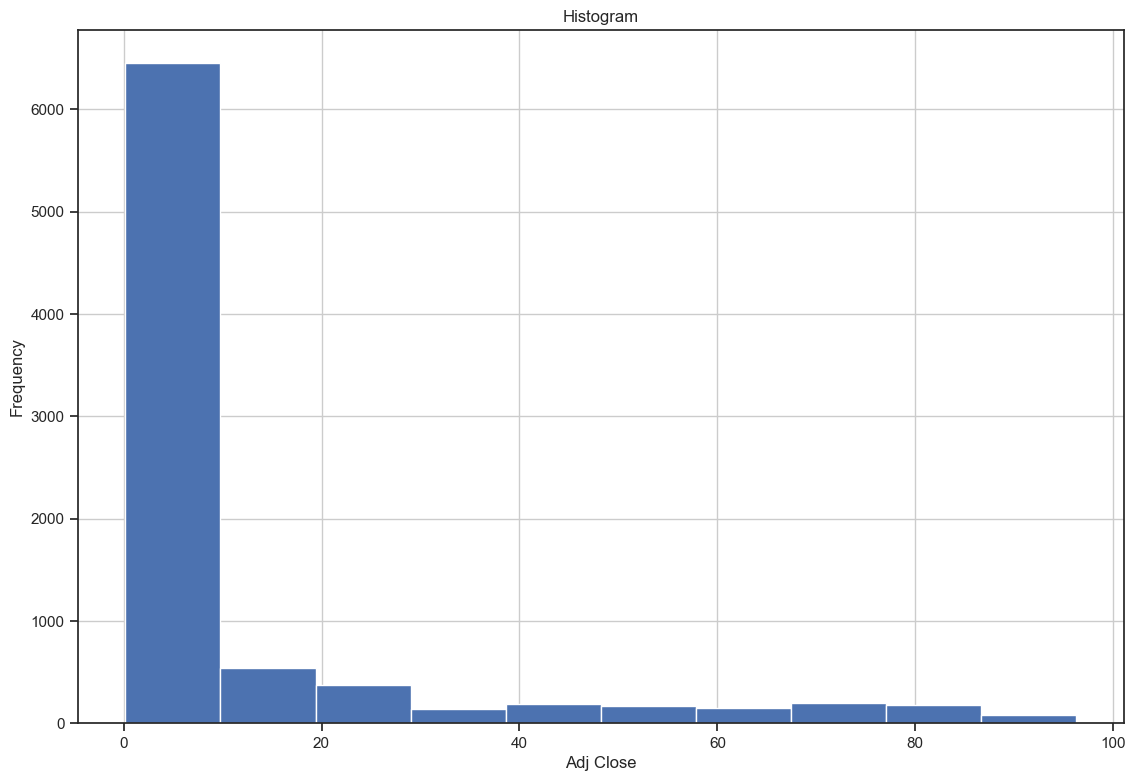

In [178]:
fig, ax = plt.subplots(figsize=(13.5, 9))
plt.hist(apple['Adj Close'])
plt.title('Histogram')
plt.grid()
plt.xlabel('Adj Close')
plt.ylabel('Frequency')

## The below exercises (77-80) required to use Online_Retail.csv file

### 77. Import the dataset from this Online_Retail.csv and assign it to a variable called online_rt

In [22]:
online_rt = pd.read_csv('Online_Retail.csv',  encoding='latin-1')
online_rt

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France


### 78. Create a barchart with the 10 countries that have the most 'Quantity' ordered except UK

<Axes: xlabel='Country'>

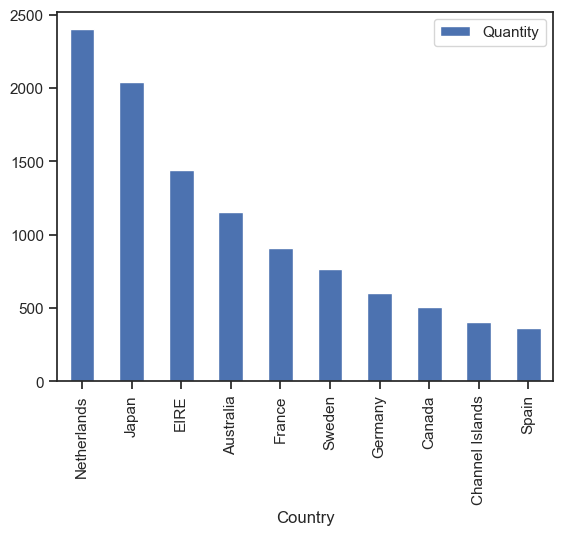

In [65]:
uk = online_rt.drop(online_rt[online_rt.Country == 'United Kingdom'].index)
q = uk.pivot_table(index='Country',values='Quantity',aggfunc='max')
qc = q.sort_values('Quantity',ascending=False)
c = qc.head(10)
c.plot(kind='bar')

### 79.  Exclude negative Quatity entries

In [41]:
online_rt_n = online_rt[online_rt['Quantity']>=0]
online_rt_n

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France


### 80. Create a scatterplot with the Quantity per UnitPrice by CustomerID for the top 3 Countries
Hint: First we need to find top-3 countries based on revenue, then create scater plot between Quantity and Unitprice for each country separately


<Axes: xlabel='CustomerID'>

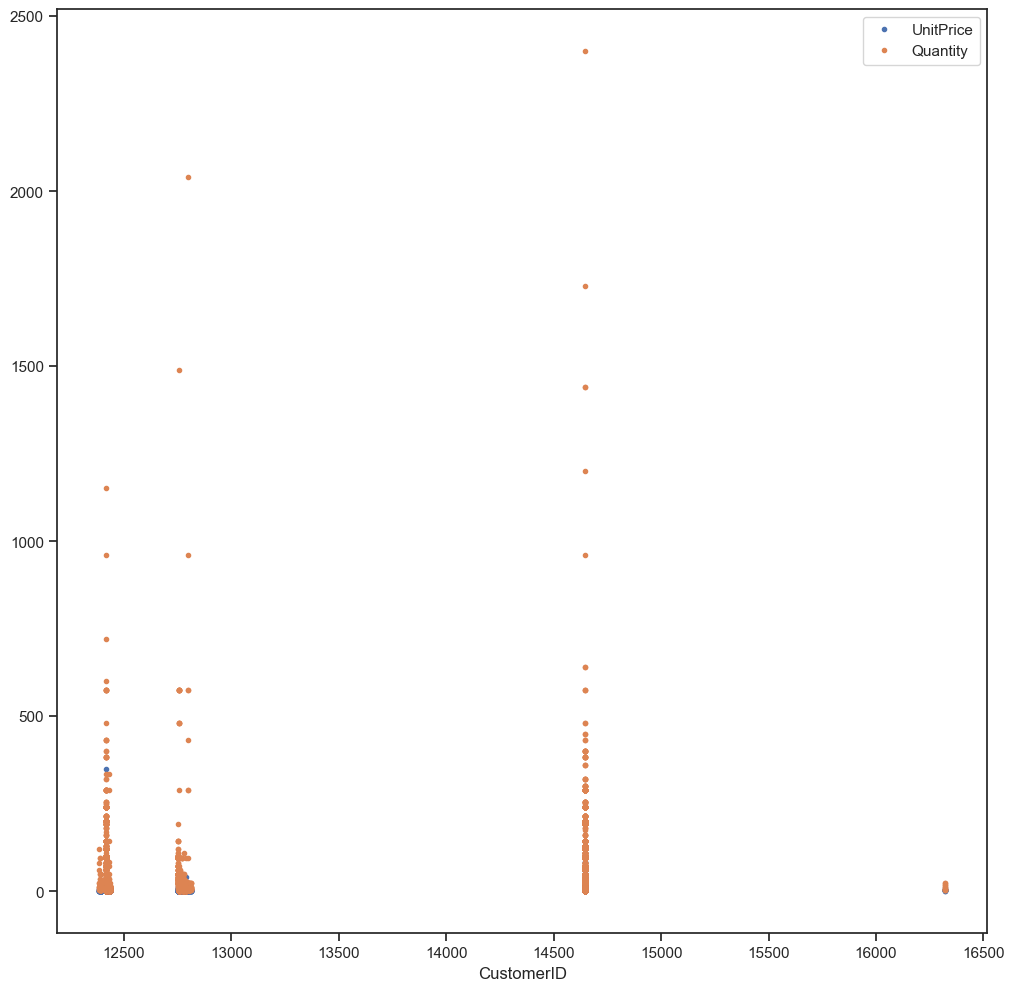

In [91]:
#finding 1st 3 values based on Revenue
online_rt_n['Revenue']=online_rt_n['Quantity']*online_rt_n['UnitPrice']
r = pd.pivot_table(data=online_rt_n,index = 'Country', values = 'Revenue')
rc = r.sort_values('Revenue',ascending = False)
ac = rc.head(3)

#ac.pivot_table(index = 'Country',values = ['UnitPrice','Quantity'])
top3 = online_rt_n[online_rt_n.Country.isin(['Netherlands','Australia','Japan'])]
top3.plot(x='CustomerID',y=['UnitPrice','Quantity'],kind='line',style='.',figsize=[12,12])
#online_rt_n_r.plot(x=['CustomerID'],y=['UnitPrice','Quantity'],kind='line',style='.')

## The below exercises (81-90) required to use FMCG_Company_Data_2019.csv file

### 81. Import the dataset FMCG_Company_Data_2019.csv and assign it to a variable called company_data

In [174]:
company_data = pd.read_csv('FMCG_Company_Data_2019.csv')

company_data

,Month,FaceCream,FaceWash,ToothPaste,Soap,Shampo,Moisturizer,Total_Units,Total_Revenue,Total_Profit
0,Jan-19,2500,1500,5200,9200,1200,1500,21100,3584890,211000
1,Feb-19,2630,1200,5100,6100,2100,1200,18330,2864979,183300
2,Mar-19,2140,1340,4550,9550,3550,1340,22470,4058082,224700
3,Apr-19,3400,1130,5870,8870,1870,1130,22270,2890646,222700
4,May-19,3600,1740,4560,7760,1560,1740,20960,2997280,209600
5,Jun-19,2760,1555,4890,7490,1890,1555,20140,2857866,201400
6,Jul-19,2980,1120,4780,8980,1780,1120,29550,5735655,295500
7,Aug-19,3700,1400,5860,9960,2860,1400,36140,5196932,361400
8,Sep-19,3540,1780,6100,8100,2100,1780,23400,3060720,234000
9,Oct-19,1990,1890,8300,10300,2300,1890,26670,4661916,266700


### 82. Create line chart for Total Revenue of all months with following properties
- X label name = Month
- Y label name = Total Revenue

<Axes: xlabel='Month'>

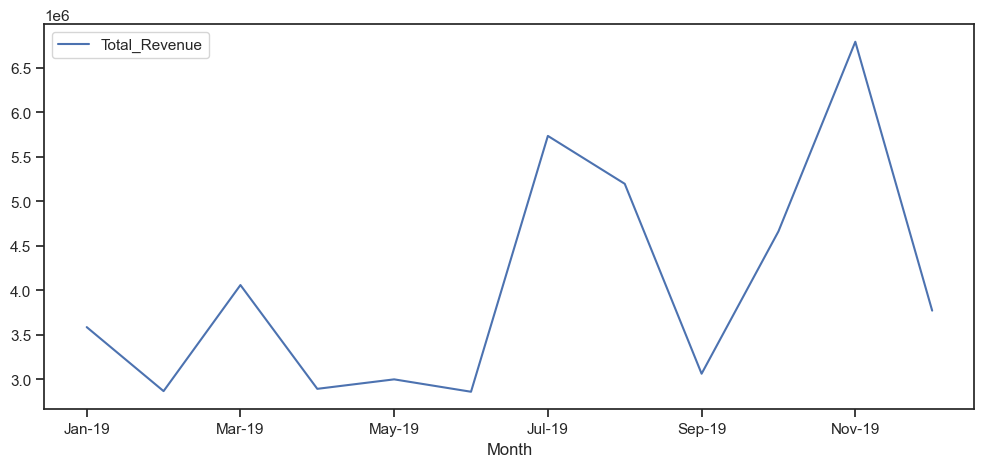

In [176]:
company_data.plot(kind='line',x='Month',y='Total_Revenue',figsize=[12,5])

#df = pd.pivot_table(data = company_data,index = 'Month',values = 'Total_Revenue')

#df.plot(kind = 'line')

#df.figsize = (12,5)

### 83. Create line chart for Total Units of all months with following properties
- X label name = Month
- Y label name = Total Units
- Line Style dotted and Line-color should be red
- Show legend at the lower right location.

<AxesSubplot:xlabel='Month'>

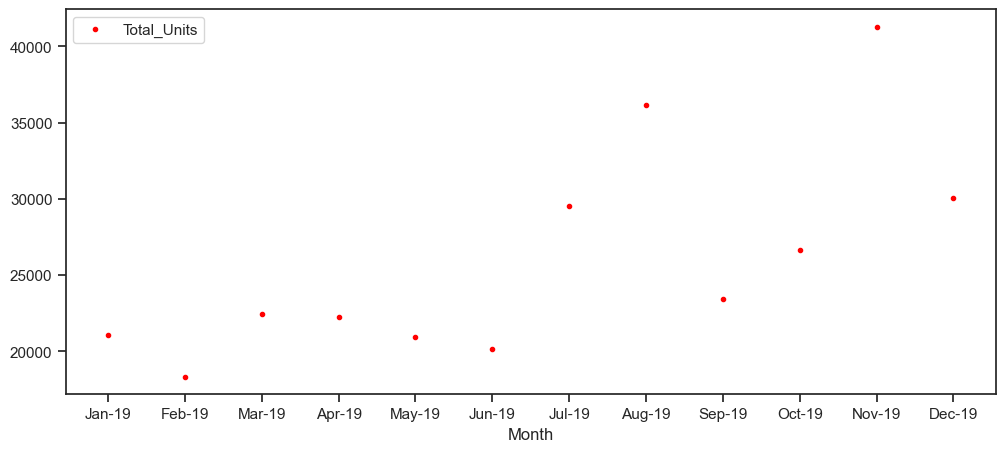

In [34]:
company_data.plot(kind='line',x='Month',y='Total_Units',figsize=[12,5],color='Red',style='.',xticks=np.arange(0,12))

### 84. Read all product sales data (Facecream, FaceWash, Toothpaste, Soap, Shampo, Moisturizer) and show it  using a multiline plot
- Display the number of units sold per month for each product using multiline plots. (i.e., Separate Plotline for each product ).

<AxesSubplot:xlabel='Month'>

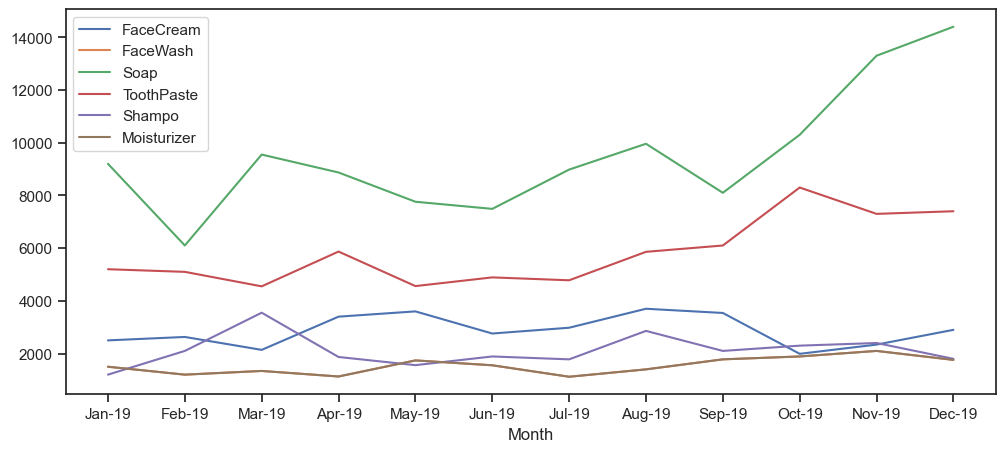

In [109]:
company_data.plot(kind='line',
                  x='Month',
                  y = ['FaceCream','FaceWash','Soap','ToothPaste','Shampo','Moisturizer'],
                  figsize=[12,5],
                  xticks=np.arange(0,12))

### 85. Create Bar Chart for soap of all months and Save the chart in folder

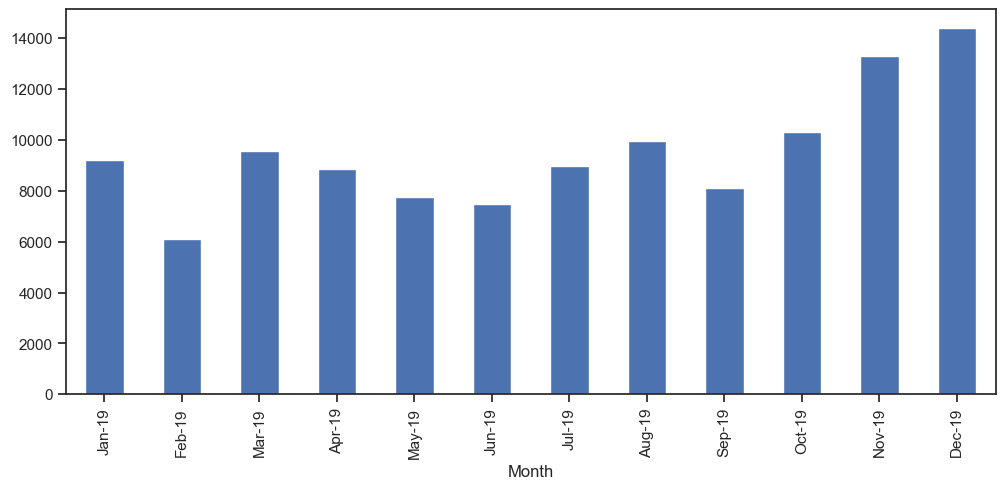

In [42]:
ab=company_data[['Month','Soap']]
ab.plot(kind='bar',x='Month',y ='Soap',figsize=[12,5],legend=False)
plt.savefig('Soap_Data.png')

### 86. Create Stacked Bar Chart for Soap, Shampo, ToothPaste for each month
The bar chart should display the number of units sold per month for each product. Add a separate bar for each product in the same chart.

<AxesSubplot:xlabel='Month'>

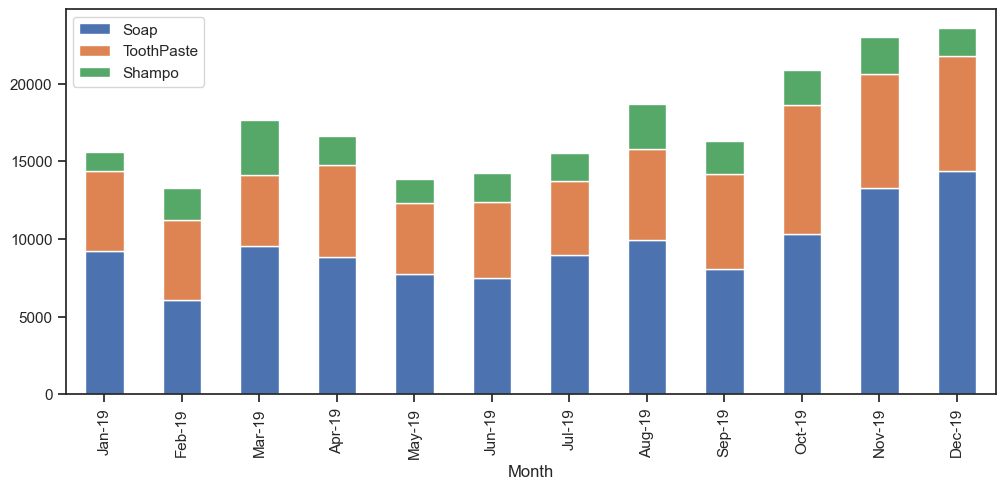

In [41]:
company_data.plot(kind='bar',x='Month',y =['Soap','ToothPaste','Shampo'],figsize=[12,5],stacked=True)

### 87. Create Histogram for Total Revenue

Text(0, 0.5, 'Frequency')

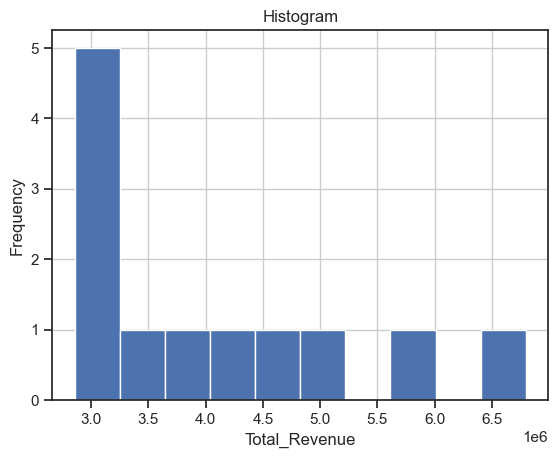

In [39]:
plt.hist(company_data.Total_Revenue)
plt.title('Histogram')
plt.grid()
plt.xlabel('Total_Revenue')
plt.ylabel('Frequency')

### 88. Calculate total sales data (quantity) for 2019 for each product and show it using a Pie chart. Understand percentage contribution from each product

array([<AxesSubplot:ylabel='Jan-19'>, <AxesSubplot:ylabel='Feb-19'>,
       <AxesSubplot:ylabel='Mar-19'>, <AxesSubplot:ylabel='Apr-19'>,
       <AxesSubplot:ylabel='May-19'>, <AxesSubplot:ylabel='Jun-19'>,
       <AxesSubplot:ylabel='Jul-19'>, <AxesSubplot:ylabel='Aug-19'>,
       <AxesSubplot:ylabel='Sep-19'>, <AxesSubplot:ylabel='Oct-19'>,
       <AxesSubplot:ylabel='Nov-19'>, <AxesSubplot:ylabel='Dec-19'>],
      dtype=object)

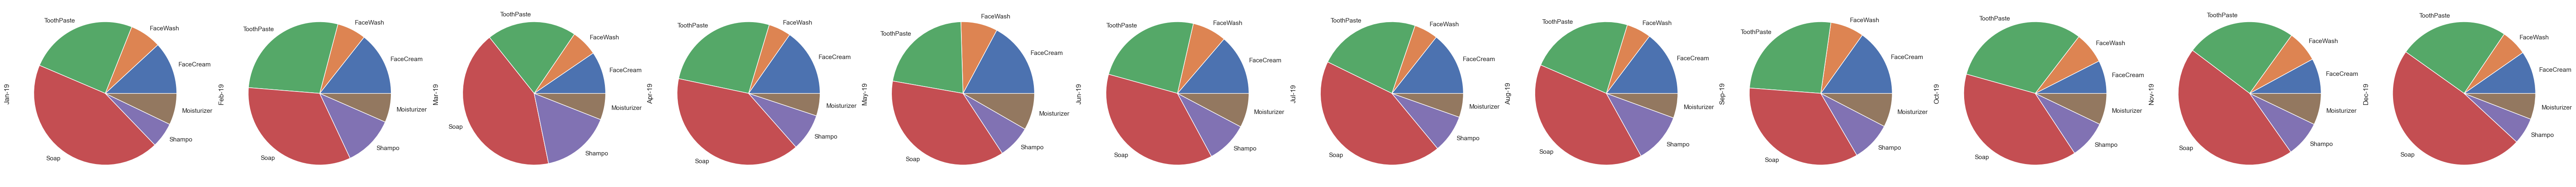

In [36]:
bc = company_data.iloc[:,0:7]
bc=bc.set_index('Month')
bc.T.plot(kind='pie',
          x='Month',
          subplots=True,
          legend=False,
          figsize=[80,100])

,Month,FaceCream,FaceWash,ToothPaste,Soap,Shampo,Moisturizer,Total_Units,Total_Revenue,Total_Profit
0,Jan-19,2500,1500,5200,9200,1200,1500,21100,3584890,211000
1,Feb-19,2630,1200,5100,6100,2100,1200,18330,2864979,183300
2,Mar-19,2140,1340,4550,9550,3550,1340,22470,4058082,224700
3,Apr-19,3400,1130,5870,8870,1870,1130,22270,2890646,222700
4,May-19,3600,1740,4560,7760,1560,1740,20960,2997280,209600
5,Jun-19,2760,1555,4890,7490,1890,1555,20140,2857866,201400
6,Jul-19,2980,1120,4780,8980,1780,1120,29550,5735655,295500
7,Aug-19,3700,1400,5860,9960,2860,1400,36140,5196932,361400
8,Sep-19,3540,1780,6100,8100,2100,1780,23400,3060720,234000
9,Oct-19,1990,1890,8300,10300,2300,1890,26670,4661916,266700


### 89. Create line plots for Soap & Facewash of all months in a single plot using Subplot

<AxesSubplot:xlabel='Month', ylabel='FaceWash'>

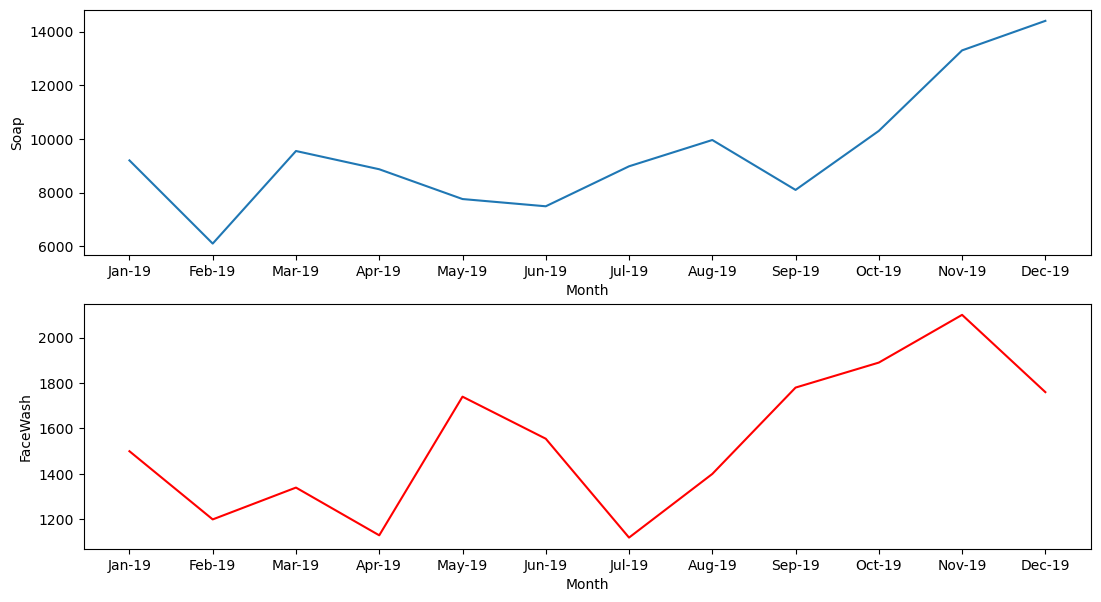

In [37]:
fig,axes=plt.subplots(nrows=2,ncols=1,figsize=[13,7])
sns.lineplot(data=company_data,x='Month',y='Soap',ax=axes[0])
sns.lineplot(data=company_data,x='Month',y='FaceWash',ax=axes[1],color='Red')

### 90. Create Box Plot for Total Profit variable

{'whiskers': [<matplotlib.lines.Line2D at 0x28ff6c45a00>,
 'caps': [<matplotlib.lines.Line2D at 0x28ff6c47e20>,
 'boxes': [<matplotlib.lines.Line2D at 0x28ff6c453d0>],
 'medians': [<matplotlib.lines.Line2D at 0x28ff6c47310>],
 'fliers': [<matplotlib.lines.Line2D at 0x28ff6c47460>],
 'means': []}

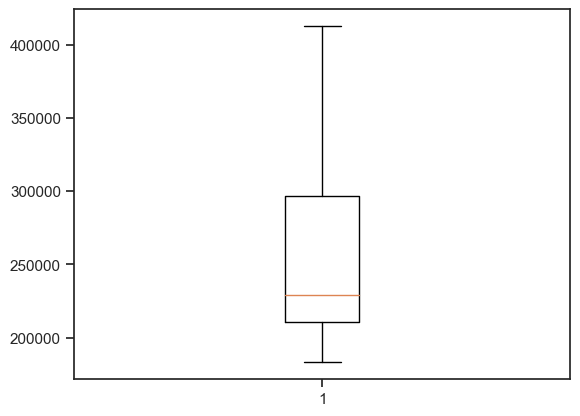

In [43]:
plt.boxplot(company_data['Total_Profit'])